In [1]:
%matplotlib inline

In [2]:
import noise
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from random import randint
import random
from matplotlib.colors import LinearSegmentedColormap
from itertools import product, count
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    background-color: #f5f8fc;
}
</style>
""")

# Subject: Perlin Noise
### Explored by: Tihomir Todorov 
The goal of this sample project is to explore what Perlin Noise is, how does it work and what are the implementations that is has. I will be trying different approaches to recreate the famous algorithm. 

### Table of Contents
1. [Introduction](#introduction)
    1. [What is Perlin noise?](#what_is_perlin)
    2. [Use Cases](#use_cases)
2. [Perlin 1D](#perlin_1d)
3. [Perlin 2D](#perlin_2d)
4. [Python Implementation](#python_implementation)
    1. [2D Example](#2d_example)
    2. [3D Example](#3d_example)
5. [Comparisons](#comparisons)
    1. [Perlin Vs. Value Noise](#perlin_vs_value)
    1. [Perlin Vs. Simulation Noise](#perlin_vs_simulation)
    1. [Perlin Vs. Simplex Noise](#perlin_vs_simplex)
6. [Resources](#resources)

 <a name="introduction"></a>
## 1. Introduction

<a name="what_is_perlin"></a>
### A. What is Perlin noise? 

Ken Perlin developed the noise function while working on the original Tron movie in the early 1980s; he used it to create procedural textures for computer-generated effects. In 1997, Perlin won an Academy Award in technical achievement for this work.

[Perlin noise](https://en.wikipedia.org/wiki/Perlin_noise) can be used to generate various effects with natural qualities, such as clouds, landscapes, and patterned textures like marble.Perlin noise has a more organic appearance because it produces a naturally ordered (“smooth”) sequence of pseudo-random numbers.


<a href="https://imgur.com/UOdBzVi"><img src="https://i.imgur.com/UOdBzVi.png" style="width:700px" title="source: imgur.com" /></a>
__As you can see, the figure above shows us how Perlin noise can be used to generate a "controlled" form of randomness.__

<a name="use_cases"></a>
### B. Use Cases

| Simulating handwriting (1D)| Generating texture of a surface (2D)| Generating terrain (3D)|
| :-------------------------: | :-----------------------------------: | :--------------: |
|  **A normal straigth square**  |      **2D generated map texture**       | **3D generated terrain** |
|<a href="https://imgur.com/g7Dh1h5"><img src="https://i.imgur.com/g7Dh1h5.png" title="source: imgur.com" style="width:250px" /></a>|<a href="https://imgur.com/ckuIai2"><img src="https://i.imgur.com/ckuIai2.jpg" title="source: imgur.com" style="width:250px"/></a>|<a href="https://imgur.com/UePEXev"><img src="https://i.imgur.com/UePEXev.png" title="source: imgur.com" style="width:280px"  /></a>|
| **And a Perlin generated square**| **How about some 2D Perlin Magma?**| **And a 3D Perlin Magma ball**|
|<a href="https://imgur.com/pgnQgPU"><img src="https://i.imgur.com/pgnQgPU.png" title="source: imgur.com" style="width:250px" /></a>|<a href="https://imgur.com/Z52oVRX"><img src="https://i.imgur.com/Z52oVRX.png" title="source: imgur.com" style="width:300px"/></a>|<a href="https://imgur.com/mgaCPra"><img src="https://i.imgur.com/mgaCPra.png" title="source: imgur.com" style="width:280px" /></a>|

<a name="perlin_1d"></a>
## 2. Perlin 1D

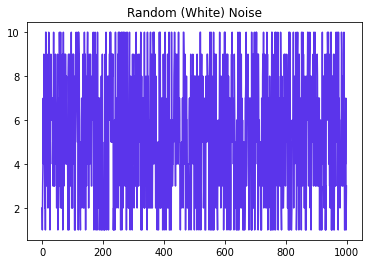

In [3]:
#First of all let's generate and plot some random noise. The next value in the sequence is generated randomly,
#i.e independent of the previous value.

normal_rand = [random.randint(1,10) for i in range(1000)]
plt.rcParams["figure.figsize"] = (6,4)
plt.title("Random (White) Noise")
plt.plot(range(1000),normal_rand, color="#5b34eb")

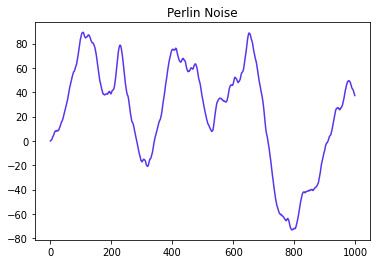

In [4]:
#And now the visualization of Perlin Noise. Instead of setting the value as the random number,
#a random number is added to a "momentum" variable which is then added to the previously generated
#value in order to create the next value in the sequence. 
#The range of the random momentum modifier variable is dynamic depending on how close both the momentum value 
#and the generated values are to their set boundaries.

perlin_rand = []
old_value = 0
momentum = 0
momentum_list = []
for i in range(1000):
    momentum += (random.random()-0.5) + ((-(momentum**3))/100) + ((-(old_value**3))/10**7)
    old_value = old_value + momentum
    perlin_rand.append(old_value)
    momentum_list.append(momentum)
plt.rcParams["figure.figsize"] = (6,4)    
plt.title("Perlin Noise")
plt.plot(range(1000),perlin_rand, color="#5b34eb")

<a name="perlin_2d"></a>
## 3. Perlin 2D

Let's consider 2D Perlin noise, i.e. noise = f(x,y), a scalar value for any point in 2D. A grid is laid out where the lines represent intenger values of x and y:


<a href="https://imgur.com/JG8QMLe"><img src="https://i.imgur.com/JG8QMLe.png" title="source: imgur.com" style="width:270px" alt="Fig. 1"/></a>
$$Fig. 1$$
$$noise = f(x,y)$$
(Fig.1) For every grid point, we create a random gradient vector. This is a vector (typically of uniform length, e.g. 1) pointing in a random direction from the grid point. The grid points and gradient vectors are shown in purple in the graph above. The vectors are called gradients because the noise function will have a positive slope (i.e. will increase) in the direction of each gradient vector.


<a href="https://imgur.com/KmHStzf"><img src="https://i.imgur.com/KmHStzf.png" title="source: imgur.com" style="width:270px"/></a>
$$Fig. 2$$
(Fig.2) For every pixel P that we need to compute noise for, we evaluate a function using the four neighboring grid points Q and their gradient vectors. Here the pixel we're computing is marked as a cyan dot, the four surrounding grid points are marked as purple dots, and their gradient vectors are again shown in purple.


<a href="https://imgur.com/Lr9IsMH"><img src="https://i.imgur.com/Lr9IsMH.png" title="source: imgur.com" style="width:270px"/></a>
$$Fig. 3$$
(Fig. 3) For each neighboring grid point Q, we take the dot product of the gradient G at Q with the difference vector (P - Q). The result of the dot product (with easing) contributes toward the noise value at P. Here the difference vectors (P - Q) are shown in pink.

<a href="https://imgur.com/b02iR4u"><img src="https://i.imgur.com/b02iR4u.png" title="source: imgur.com" style="width:270px"/></a>
$$Fig. 4$$
(Fig. 4) Here is the raw contribution of one gradient vector G on its four surrounding grid squares, based on its dot product with the difference vector (P - Q) from the grid point Q to each pixel P. A positive value is yellow; negative is blue.

<a href="https://imgur.com/dH5WGEN"><img src="https://i.imgur.com/dH5WGEN.png" title="source: imgur.com" style="width:270px"/></a>
$$Fig. 5$$
(Fig. 5) Here is the same contribution, multiplied by an eased dropoff filter (and scaled up for visibility). The dropoff filter, applied for x and y axes, is:

$$fade(1 - abs(P.x - Q.x)) · fade(1 - abs(P.y - Q.y))$$

Where:
$$fade(t) = 3t2 - 2t3$$   

<a href="https://imgur.com/1ttg48J"><img src="https://i.imgur.com/1ttg48J.png" title="source: imgur.com" style="width:270px"/></a>
$$Fig. 6$$
(Fig. 6)The above fade function has a zero first derivative at t=0 and t=1, the borders of each grid cell. That makes it look continuous when the Perlin noise result is used as a color or opacity. But if the noise is used for a normal map, for example, you need the 2nd derivative to be zero (and therefore continuous) at the borders in order to avoid unsightly discontinuities. Hence the "improved" fade/dropoff filter (interpolant function) that has zero 2nd derivative at t=0 and t=1.

Where:
$$fade(t) = 6t5 - 15t4 + 10t3$$   

<a href="https://imgur.com/uHFXT6J"><img src="https://i.imgur.com/uHFXT6J.png" title="source: imgur.com" /></a>
$$Fig. 7$$
(Fig. 7) Here is the noise field with the contributions from different gradients overlapping (summing).

<a name="python_implementation"></a>
## 4. Python Implementation

<a name="2d_example"></a>
### A. 2D Example

1. Let's first start with defining a N-by-N (**with the same number of rows and columns**) matrix:

$$R = \left[\begin{array}{ccc}\cdots & \cdots & \cdots\\\cdots & \cdots & \cdots\\\cdots & \cdots & \cdots\\\end{array}\right]$$

Square matrices are often used to represent simple linear transformations, such as shearing or rotation.
Below we are generating a NxN matrix of unit length vectors $\hat{v}$:

In [5]:
def generate_unit_vectors(n,m):
    'Generates matrix NxN of unit length vectors'
    phi = np.random.uniform(0, 2*np.pi, (n, m))
    vec = np.stack((np.cos(phi), np.sin(phi)), axis=-1)
    return vec

2. Next step is to create a function that defines the quintic interpolation. A quintic function is a function of the form:

$$g(x) = ax^5 + bx^4 + cx^3 + dx^2 + ex$$

Where a, b, c, d, e and f are members of a field, typically of the rational numbers, the real numbers or the complex numbers, and **a is nonzero**. In other words, a **quintic function is defined by a polynomial of degree five.**

In our case:

<a href="https://imgur.com/314deJy"><img src="https://i.imgur.com/314deJy.png" title="source: imgur.com"  width="400px"/></a>

In [6]:
'''Quintic Interpolation'''

def qz(t):
    return t * t * t * (t * (t * 6 - 15) + 10)

In [7]:
def generate_2D_perlin_noise(size = (200,200), node_distance=1):
    '''
    generate_2D_perlin_noise(size, ns)
    Generate 2D array of size x size filled with Perlin noise.
    Parameters'''

    if type(size) == int:
        size = (size, size)
    node_count = [int(size[0] / node_distance), int(size[1] / node_distance)]  # number of nodes
    grid_size_h = int(size[0] / node_distance + 1)  # number of points in grid
    grid_size_w = int(size[1] / node_distance + 1)  # number of points in grid

    # generate grid of vectors
    vec = generate_unit_vectors(grid_size_h, grid_size_w)

    # generate some constants in advance
    ad, ar = np.arange(node_distance), np.arange(-node_distance, 0, 1)
    bd, br = np.arange(node_distance), np.arange(-node_distance, 0, 1)

    # vectors from each of the 4 nearest nodes to a point in the NSxNS patch
    vectors = np.zeros((node_distance, node_distance, 4, 1, 2))
    
    vectors[:, :, 0, 0] = np.stack(np.meshgrid(bd, ad, indexing='xy'), axis=2)
    vectors[:, :, 1, 0] = np.stack(np.meshgrid(br, ad, indexing='xy'), axis=2)
    vectors[:, :, 2, 0] = np.stack(np.meshgrid(bd, ar, indexing='xy'), axis=2)
    vectors[:, :, 3, 0] = np.stack(np.meshgrid(br, ar, indexing='xy'), axis=2)

    interpolation_coefficients = qz(np.stack((np.zeros((node_distance, node_distance, 2)),
                     np.stack(np.meshgrid(ad, bd, indexing='ij'), axis=2)),
           axis=2)/node_distance)
    dd = np.stack(np.meshgrid(ad, bd, indexing='ij'), axis=2)
    dd = dd.astype('float')
    interpolation_coefficients[:, :, 0] = 1 - interpolation_coefficients[:, :, 1]
    
    d0 = interpolation_coefficients[..., 0].copy().reshape(node_distance, node_distance, 1, 2)
    d1 = interpolation_coefficients[..., 1].copy().reshape(node_distance, node_distance, 2, 1)
    

    # make an empy matrix
    perlin_array = np.zeros((size[0], size[1]))
    # reshape for convenience
    perlin_reshaped = perlin_array.reshape(node_count[0], node_distance, node_count[1], node_distance)

    # calculate values for a NSxNS patch at a time
    for i in np.arange(node_count[0]):
        for j in np.arange(node_count[1]):  
            av = vec[i:i+2, j:j+2].reshape(4, 2, 1)
            at = np.matmul(vectors, av).reshape(node_distance, node_distance, 2, 2)
            # horizontal and vertical interpolation
            perlin_reshaped[i, :, j, :] = np.matmul(np.matmul(d0, at), d1).reshape(node_distance, node_distance)

    return perlin_array

### Let's make some noise! 

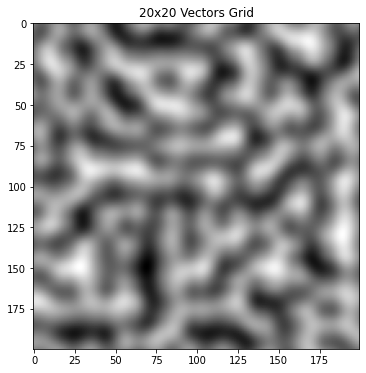

In [19]:
'''Starting with an image of size 200x200, 
filled with noise, generated by 20x20 vectors grid'''

img1 = generate_2D_perlin_noise(200, 20)
plt.rcParams["figure.figsize"] = (8,6)
plt.title("20x20 Vectors Grid")
plt.imshow(img1, cmap='gray')

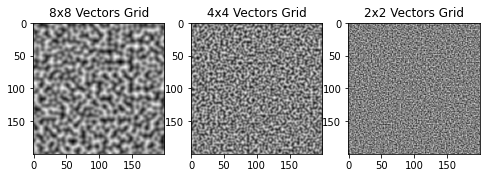

In [18]:
'''Testing with different types of grids.'''

img1 = generate_2D_perlin_noise(200, 8)
plt.subplot(1, 3, 1)
plt.title("8x8 Vectors Grid")
plt.imshow(img1, cmap='gray')

img2 = generate_2D_perlin_noise(200, 4)
plt.subplot(1, 3, 2)
plt.title("4x4 Vectors Grid")
plt.imshow(img2, cmap='gray')

img3 = generate_2D_perlin_noise(200, 2)
plt.subplot(1, 3, 3)
plt.title("2x2 Vectors Grid")
plt.imshow(img3, cmap='gray')

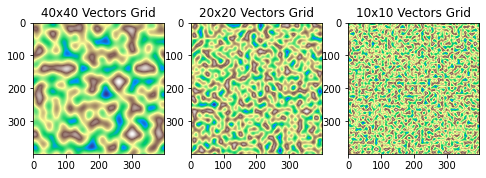

In [40]:
'''
By changing the size and the cmap parameter we can
obtain countless possibilities of how to
visualize the noise (in this case as terrain).
'''

img4 = generate_2D_perlin_noise(400, 40)
plt.subplot(1, 3, 1)
plt.title("40x40 Vectors Grid")
plt.imshow(img4, cmap='terrain')

img5 = generate_2D_perlin_noise(400, 20)
plt.subplot(1, 3, 2)
plt.title("20x20 Vectors Grid")
plt.imshow(img5, cmap='terrain')

img6 = generate_2D_perlin_noise(400, 10)
plt.subplot(1, 3, 3)
plt.title("10x10 Vectors Grid")
plt.imshow(img6, cmap='terrain')



#### Looks cool, right? Never played Minecraft, but now I can understand how terrain generation works there.

### Just to play a little! 

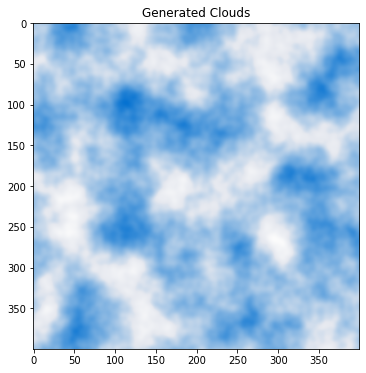

In [41]:
'''
One famous inplementation of Perlin Noise
is to generate artificial clouds.
It is made out of four images 
generated with grids of different size.
'''

img7 = generate_2D_perlin_noise(400, 80)
img8 = generate_2D_perlin_noise(400, 40)
img9 = generate_2D_perlin_noise(400, 20)
img10 = generate_2D_perlin_noise(400, 10)

img = (img7 + img8 + img9 + img10) / 4

cmap = LinearSegmentedColormap.from_list('sky',
                                        [(0, '#0572D1'),
                                         (0.75, '#E5E8EF'),
                                         (1, '#FCFCFC')])

img = cm.ScalarMappable(cmap=cmap).to_rgba(img)

plt.rcParams["figure.figsize"] = (8,6)
plt.title("Generated Clouds")
plt.imshow(img)

<a name="3d_example"></a>
### B. 3D Example

#### This is the part I had the most fun with, creating realistic landmass in 3D. This part of the project is inspired by JackMckew's Blog (check Resources)

Text(0.5, 1.0, '2D Terrain')

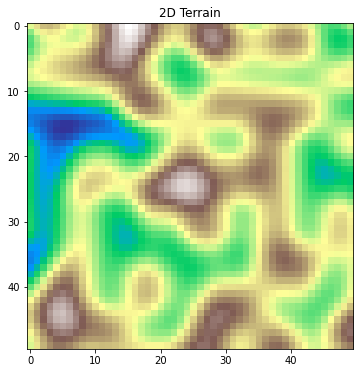

In [37]:
'''
We will be using noise package
and first of all we will create the
required settings for the function

Note: By changing just the size parameter
you can obtain countless variation of the terrain.
'''

shape = (50,50)
scale = 100.0
octaves = 10
persistence = 0.5
lacunarity = 10.0

'''
Now to generate our 2D terrain! We initialise a numpy array,
that will contain the values of our world.
'''

world = np.zeros(shape)

        
'''
As we initalise the array with all zero values, 
now it is time to iterate through the empty array 
and fill it with Perlin Noise!
'''

for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i/scale, 
                                    j/scale, 
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity, 
                                    repeatx=1024, 
                                    repeaty=1024, 
                                    base=42)

'''
We have now initialised our 2D array 
with all the values inside for our terrain. 
Since we are mimicking topography, 
let's use the 'terrain' colormap to plot it. 
'''

matplotlib.pyplot.imshow(world,cmap='terrain')
plt.title("2D Terrain")

#### Looks great, doesn't it?

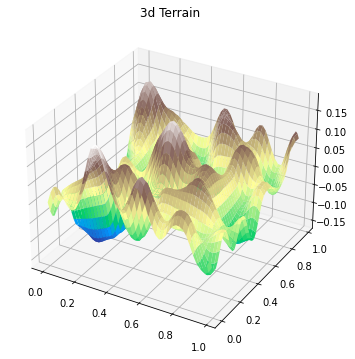

In [38]:
'''
For plotting this in 3 dimensions, 
we must initialise 2 more arrays 
which will contain the x-y co-ordinates of our world.
'''

lin_x = np.linspace(0,1,shape[0],endpoint=False)
lin_y = np.linspace(0,1,shape[1],endpoint=False)

x,y = np.meshgrid(lin_x,lin_y)

fig = matplotlib.pyplot.figure()

ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x,y,world,cmap='terrain')

plt.title("3d Terrain")

plt.show()

<a name="comparisons"></a>
## 5. Comparisons
In this section we will look briefly at other types of noise and their advantages / disadvantages.

<a name="perlin_vs_value"></a>
### A. Perlin vs. Value Noise
  - Value noise is a type of noise commonly used as a procedural texture primitive in computer graphics. It is conceptually different from, and often confused with gradient noise, examples of which are Perlin noise and Simplex noise. This method consists of the creation of a lattice of points which are assigned random values. The noise function then returns the interpolated number based on the values of the surrounding lattice points.
  
<a href="https://imgur.com/3nzG1IT"><img src="https://i.imgur.com/3nzG1IT.png" title="source: imgur.com" /></a>
  
- Value noise: we paint the points in the grid with random values (white noise) and fill the surrounding pixels by linear interpolation. This will look ugly because (among other things) some of the random grid points will happen to have similar values, and then there will be large spots with nearly uniform color (low frequency).Specifically, the pixel values in the neighborhood of a grid point will be all similar - and so we depend on the other grid points being distinct to have high frequencies... and this will be at most (with luck) of the order of the grid separation.

- Gradient noise: we compute a random (uniform, white noise) gradient in each grid point, and compute the values by interpolating the dot products of the gradient with the distances. Consider again what happens in the neighborhoood of a grid point, specifically over a small circumference, disregarding the effect of other distant grid points. It's seen that the computed image value (as a dot product) in this small neighborhood will visit -smoothly but fully- the white-black range. Then, we can expect that the image values will never have uniform spots, i.e., we won't practically have frequencies below that of the grid spacing.
<br></br>
- See [Source](https://math.stackexchange.com/questions/184121/why-is-gradient-noise-better-quality-than-value-noise)

<a name="perlin_vs_simulation"></a>
### B. Perlin vs. Simulation Noise

- Simulation noise is a function that creates a divergence-free vector field. This signal can be used in artistic simulations for the purposes of increasing the perception of extra detail.

- The function can be calculated in three dimensions by dividing the space into a regular lattice grid. With each edge is associated a random value, indicating a rotational component of material revolving around the edge. By following rotating material into and out of faces, one can quickly sum the flux passing through each face of the lattice. Flux values at lattice faces are then interpolated to create a field value for all positions.

- Perlin noise is the earliest form of lattice noise, which has become very popular in computer graphics. Perlin Noise is not suited for simulation because it is not divergence-free.

- See [Source](https://en.wikipedia.org/wiki/Simulation_noise)

<a name="perlin_vs_simplex"></a>
### C. Perlin vs. Simplex Noise

- Simplex noise is the result of an n-dimensional noise function comparable to Perlin noise but with fewer directional artifacts and, in higher dimensions, a lower computational overhead. Ken Perlin designed the algorithm in 2001 to address the limitations of his classic noise function, especially in higher dimensions.

The advantages of simplex noise over Perlin noise:

- Simplex noise has lower computational complexity and requires fewer multiplications.
- Simplex noise scales to higher dimensions (4D, 5D) with much less computational cost: the complexity is $O(n^2)$ for $n$ dimensions instead of the $O(n2^n)$ of classic noise.

- Simplex noise has no noticeable directional artifacts (is visually isotropic), though noise generated for different dimensions is visually distinct (e.g. 2D noise has a different look than 2D slices of 3D noise, and it looks increasingly worse for higher dimensions).

- Simplex noise has a well-defined and continuous gradient (almost) everywhere that can be computed quite cheaply.

- Simplex noise is easy to implement in hardware.

Whereas classical noise interpolates between the gradients at the surrounding hypergrid end points (i.e., northeast, northwest, southeast and southwest in 2D), simplex noise divides the space into simplices (i.e., $n$-dimensional triangles). This reduces the number of data points. While a hypercube in $n$ dimensions has $2^n$ corners, a simplex in $n$ dimensions has only $n + 1$ corners. The triangles are equilateral in 2D, but in higher dimensions the simplices are only approximately regular. For example, the tiling in the 3D case of the function is an orientation of the tetragonal disphenoid honeycomb.

Simplex noise is useful for computer graphics applications, where noise is usually computed over 2, 3, 4, or possibly 5 dimensions. For higher dimensions, n-spheres around n-simplex corners are not densely enough packed, reducing the support of the function and making it zero in large portions of space.

See [Source](https://en.wikipedia.org/wiki/Simplex_noise)

<a name="resources"></a>
## 6. Resources

Most sincere thanks to all the people and institutions that contributed to this exploration of Perlin Noise:

1. [Perlin noise Wiki](https://en.wikipedia.org/wiki/Perlin_noise)
2. [Adrian's soapbox](http://adrianb.io/2014/08/09/perlinnoise.html)
3. [Jack McKew's Blog](https://jackmckew.dev/3d-terrain-in-python.html)
4. [Scratchapixel 2.0](https://www.scratchapixel.com/lessons/procedural-generation-virtual-worlds/perlin-noise-part-2/perlin-noise-computing-derivatives)
5. [Den's Website](https://dens.website/articles/procedural-generation/perlin-noise)
6. [Conner Addison](http://conneraddison.com/2019/04/08/noise.html)